<h1>Analisis Prediktif : Prediksi Harga Emas di Waktu yang Akan Datang</h1>

##Business Understanding


Problem Statement dan Goals

Metodologi

Metrik

##Data Understanding

Data Loading

In [1]:
#Import library

#Data Understanding
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
#Menambah Kredential Kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Menggunduh dataset dari Kaggle
!kaggle datasets download -d sid321axn/gold-price-prediction-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gold-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Mengekstrak File Zip Dataset
!unzip '/content/gold-price-prediction-dataset.zip'

Archive:  /content/gold-price-prediction-dataset.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FINAL_USO.csv           


In [4]:
#Load Dataset
golds = pd.read_csv('/content/FINAL_USO.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
golds.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
golds.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

Deskripsi Variabel

In [6]:
golds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

<h3>Deskripsi Variabel


In [7]:
golds.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

Menangani Missing Value

In [8]:
#Melihat apakah ada nilai yang kososng
golds.isnull().values.any()

False

In [9]:
golds.columns = golds.columns.str.lower()

#Mengambil fitur yang berhubungan dengan harga emas
golds_new = golds[['open', 'high', 'low', 'close', 'adj close']]
golds_new.head()

,open,high,low,close,adj close
Date,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004


In [10]:
golds_new.columns

Index(['open', 'high', 'low', 'close', 'adj close'], dtype='object')

In [11]:
golds_new.describe()

,open,high,low,close,adj close
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,127.323434,127.854237,126.777695,127.319482,127.319482
std,17.526993,17.631189,17.396513,17.536269,17.536269
min,100.919998,100.989998,100.230003,100.500000,100.500000
25%,116.220001,116.540001,115.739998,116.052502,116.052502
50%,121.915001,122.325001,121.369999,121.795002,121.795002
75%,128.427494,129.087497,127.840001,128.470001,128.470001
max,173.199997,174.070007,172.919998,173.610001,173.610001


In [13]:
#Melihat ukuran data yang akan digunakan
golds_new.shape

(1718, 5)

In [15]:
#Membuat beberapa fungsi
#fungsi untuk menghitung pengembalian harian
def daily_returns(df: pd.DataFrame, column: str) -> pd.DataFrame:
    df[f'{column}_returns'] = df[column] / df[column].shift(1) - 1
    return df

#fungsi untuk menghitung rata-rata bergerak konvergensi divergensi(MACD)
def calculate_macd(df: pd.DataFrame, column: str, nslow: int = 26, nfast: int = 12) -> pd.DataFrame:
    emaslow = df[column].ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df[column].ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    df[f'dif_{column}'] = emafast - emaslow
    
    df[f'macd_{column}'] = df[f'dif_{column}'].ewm(
        span=9, min_periods=9, adjust=True, ignore_na=False
    ).mean()
    return df

#fungsi untuk menghitung Relative Strangth Index (RSI)
def calculate_rsi(df: pd.DataFrame, column: str, periods: int = 14) -> pd.DataFrame:
    delta = df[column].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    avg_gain = up.ewm(com=periods, adjust=False).mean()
    avg_loss = down.ewm(com=periods, adjust=False).mean().abs()

    df[f'rsi_{column}'] = 100 - 100 / (1 + avg_gain / avg_loss)
    return df

#fungsi untuk menghitung Simple Moving Average (SMA)
def calculate_sma(df: pd.DataFrame, column: str, periods: int = 15) -> pd.Series:
    sma = df[column].rolling(window=periods, min_periods=periods, center=False).mean()
    return sma

#fungsi untuk menghitung Bollinger Bands
def calculate_bands(df: pd.DataFrame, column: str, peroids: int = 15) -> pd.DataFrame:
    std = df[column].rolling(window=peroids, min_periods=peroids, center=False).std()
    sma = calculate_sma(df, column)
    df[f'upper_band_{column}'] = sma + (2 * std)
    df[f'lower_band_{column}'] = sma - (2 * std)
    return df

In [16]:
#menghitung daily return for gold adjusted close price
target_column = 'adj close'
golds_new = daily_returns(golds_new,target_column)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
# Add technical indicators for adjusted gold price
golds_new = calculate_rsi(golds_new, target_column)
golds_new = calculate_bands(golds_new, target_column)
golds_new = calculate_macd(golds_new, target_column)
golds_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,open,high,low,close,adj close,adj close_returns,rsi_adj close,upper_band_adj close,lower_band_adj close,dif_adj close,macd_adj close
Date,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,0.019038,100.000000,NaN,NaN,NaN,NaN
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,-0.002319,99.121090,NaN,NaN,NaN,NaN
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,0.013624,99.167062,NaN,NaN,NaN,NaN
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,0.001147,99.171026,NaN,NaN,NaN,NaN


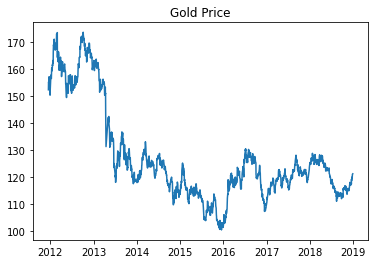

In [19]:
#Melihat data harga emas
plt.plot(golds_new[target_column])
plt.title('Gold Price')
plt.show()

In [20]:
golds_new.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'adj close_returns',
       'rsi_adj close', 'upper_band_adj close', 'lower_band_adj close',
       'dif_adj close', 'macd_adj close'],
      dtype='object')

In [21]:
#Melihat apakah masih ada data yang kosong
golds_new.isna().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
adj close_returns        1
rsi_adj close            1
upper_band_adj close    14
lower_band_adj close    14
dif_adj close           25
macd_adj close          33
dtype: int64

In [22]:
#Melihat apakah ada mata kosong pada data baru yang dibuat
golds_new.isnull().values.any()

True

In [23]:
#Karena terdapat data kosong pada data baru
#Solusinya dengan membuang data kosong yang ada
golds_new.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#Melihat apakah masih ada data yang kosong
golds_new.isnull().values.any()

False

In [25]:
#Melihat apakah masih ada data yang kosong
golds_new.isna().sum()

open                    0
high                    0
low                     0
close                   0
adj close               0
adj close_returns       0
rsi_adj close           0
upper_band_adj close    0
lower_band_adj close    0
dif_adj close           0
macd_adj close          0
dtype: int64

In [26]:
golds_new.shape

(1685, 11)

Memvisualisasikan Data

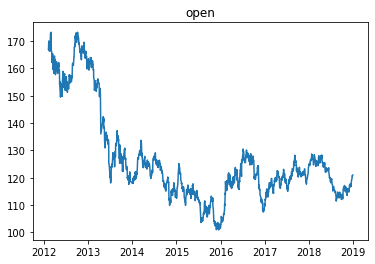

In [27]:
#Melihat data open
plt.plot(golds_new['open'])
plt.title('open')
plt.show()

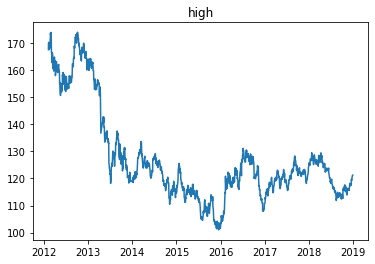

In [28]:
#Melihat data high
plt.plot(golds_new['high'])
plt.title('high')
plt.show()

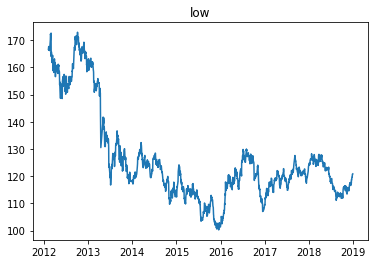

In [29]:
#Melihat data low 
plt.plot(golds_new['low'])
plt.title('low')
plt.show()

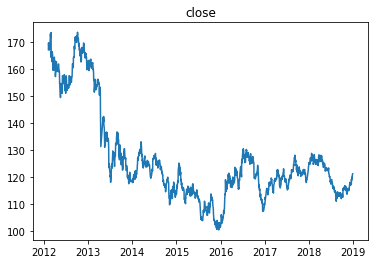

In [30]:
#Melihat data close
plt.plot(golds_new['close'])
plt.title('close')
plt.show()

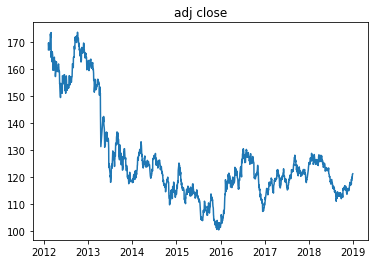

In [31]:
#Melihat data adj close
plt.plot(golds_new['adj close'])
plt.title('adj close')
plt.show()

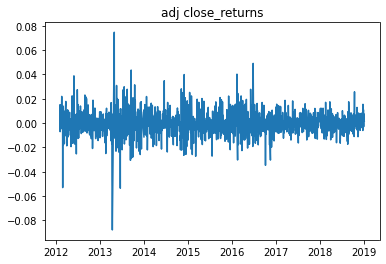

In [32]:
#Melihat data adj close returns
plt.plot(golds_new['adj close_returns'])
plt.title('adj close_returns')
plt.show()

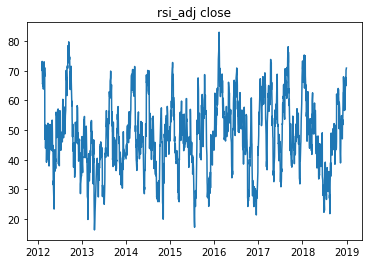

In [33]:
#Melihat data rsi adj close
plt.plot(golds_new['rsi_adj close'])
plt.title('rsi_adj close')
plt.show()

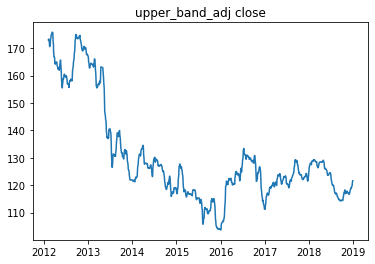

In [34]:
#Melihat data upper band adj close
plt.plot(golds_new['upper_band_adj close'])
plt.title('upper_band_adj close')
plt.show()

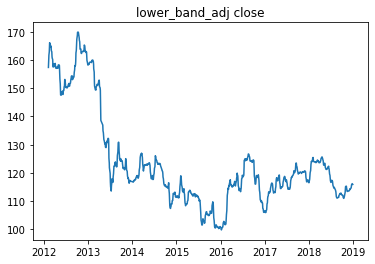

In [35]:
#Melihat data lower band adj close
plt.plot(golds_new['lower_band_adj close'])
plt.title('lower_band_adj close')
plt.show()

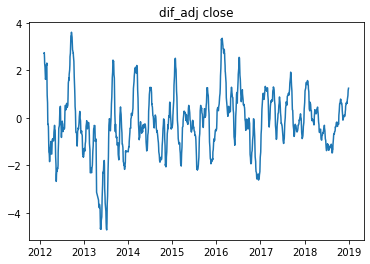

In [36]:
#Melihat data dif adj close
plt.plot(golds_new['dif_adj close'])
plt.title('dif_adj close')
plt.show()

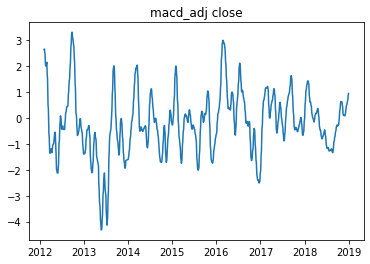

In [37]:
#Melihat data macd adj close
plt.plot(golds_new['macd_adj close'])
plt.title('macd_adj close')
plt.show()

##Data preparation

In [39]:
#Mengelompokkan fitur
feature_column = ['open', 'high', 'low', 'close', 'adj close', 'adj close_returns',
       'rsi_adj close', 'upper_band_adj close', 'lower_band_adj close',
       'dif_adj close', 'macd_adj close']

target_column = 'adj close'

Normalisasi

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_scaler_data = scaler.fit_transform(golds_new[feature_column])
feature_scaler = pd.DataFrame(columns=feature_column, data=feature_scaler_data, index=golds_new.index)
feature_scaler.head()

,open,high,low,close,adj close,adj close_returns,rsi_adj close,upper_band_adj close,lower_band_adj close,dif_adj close,macd_adj close
Date,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.912050,0.912050,0.523663,0.807275,0.961240,0.821988,0.893394,0.911893
2012-02-07,0.919480,0.945539,0.920622,0.946519,0.946519,0.633350,0.852413,0.965092,0.837893,0.896986,0.915193
2012-02-08,0.945490,0.943760,0.925437,0.930105,0.930105,0.497024,0.798744,0.965108,0.853105,0.885164,0.914871
2012-02-09,0.955866,0.949370,0.927775,0.923540,0.923540,0.523019,0.777317,0.964000,0.866467,0.867900,0.910578
2012-02-10,0.907167,0.912014,0.909341,0.911503,0.911503,0.508313,0.737688,0.958155,0.883757,0.842920,0.901486


Pembagian dataset

In [41]:
target_column = golds_new[target_column].shift(-1)
val_y = target_column[-90:-1] #mengambil data dari target_column untuk data validasi sebanyak 89 data
target_column = target_column[:-90]

val_x = feature_scaler[-90:-1] #mengambil data dari feature_column untuk data validasi sebanyak 89 data
feature_scaler = feature_scaler[:-90]

In [42]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(feature_scaler, target_column, test_size = 0.2, random_state = 123)

In [43]:
X_train.shape

(1276, 11)

In [44]:
X_test.shape

(319, 11)

In [45]:
y_train.shape

(1276,)

In [46]:
y_test.shape

(319,)

In [47]:
val_x.shape

(89, 11)

In [48]:
val_y.shape

(89,)

##Modeling

In [49]:
def validate_result(model, model_name):
    predicted = model.predict(val_x)
    RSME_score = np.sqrt(mean_squared_error(val_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(val_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(val_y.index, predicted,'r', label='Predict')
    plt.plot(val_y.index, val_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

Decision Tree

RMSE:  1.5079098701234233
R2 score:  0.47627746761732537


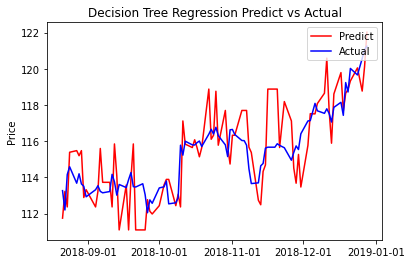

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
models = {}

model1 = DecisionTreeRegressor(random_state=0)
hist_model1 = model1.fit(X_train, y_train)

validate_result(hist_model1, 'Decision Tree Regression')
models['Decision Tree Regression'] = hist_model1

Support Vector Regressor

RMSE:  0.7197778618887654
R2 score:  0.8806705988051281


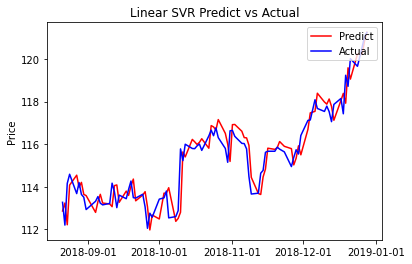

In [51]:
from sklearn.svm import SVR

model2 = SVR(kernel='linear')
hist_model2 = model2.fit(X_train, y_train)
validate_result(hist_model2, 'Linear SVR')
models['SVR'] = hist_model2

RMSE:  0.6977292514602087
R2 score:  0.8878693466641125


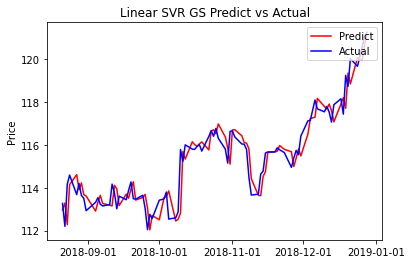

In [52]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

model2_parameters ={
    'C' :[0.5, 1.0, 10.0, 50.0],
    'epsilon' :[0, 0.1, 0.5, 0.7, 0.9]
}

model2_gridsearch = GridSearchCV(estimator=hist_model2,
                                  param_grid=model2_parameters,)

model2_gridsearch.fit(X_train, y_train)
validate_result(model2_gridsearch, 'Linear SVR GS')
models['SVR with GS'] = model2_gridsearch

Random Forest

RMSE:  0.8653000697198961
R2 score:  0.827541752417128


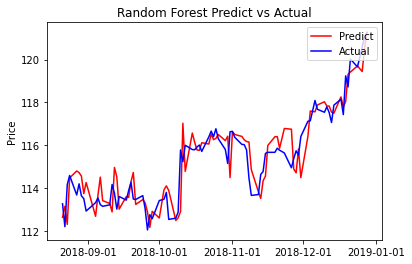

In [53]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=50, random_state=0)
hist_model3 = model3.fit(X_train, y_train)
validate_result(hist_model3, 'Random Forest')
models['Random Forest'] = hist_model3

LassoCV & RidgeCV

RMSE:  0.693070290278802
R2 score:  0.8893618115504798


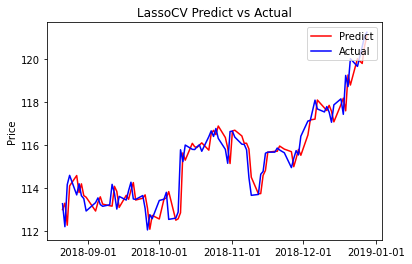

RMSE:  0.7117593375446272
R2 score:  0.8833145143685015


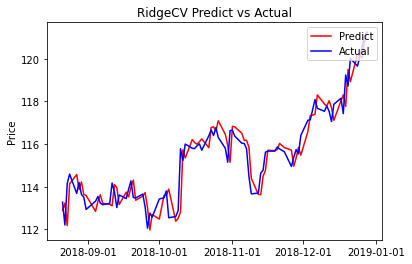

In [54]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

model4 = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
model5 = RidgeCV(gcv_mode='auto')

hist_model4 = model4.fit(X_train, y_train)
validate_result(hist_model4,'LassoCV')
models['LassoCV'] = hist_model4

hist_model5 = model5.fit(X_train, y_train)
validate_result(hist_model5,'RidgeCV')
models['RidgeCV'] = hist_model5

Gradient Boosting Regressor

RMSE:  0.7863199082432796
R2 score:  0.857587197100434


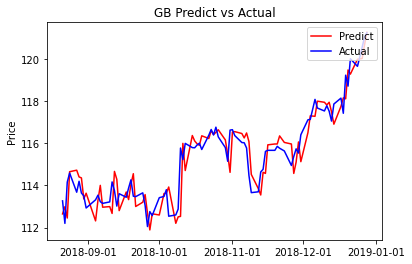

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model6 =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
hist_model6 = model6.fit(X_train,y_train)
validate_result(hist_model6,'GB')
models['GB'] = hist_model6

Stochastic Gradient Descent

RMSE:  0.7430237740731898
R2 score:  0.8728384213004013


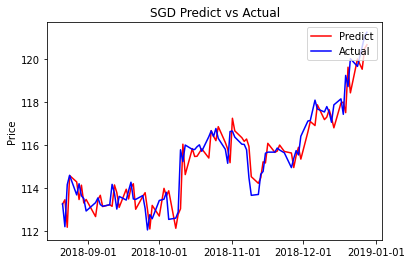

In [56]:
from sklearn.linear_model import SGDRegressor
model7 =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
hist_model7 = model7.fit(X_train,y_train)
validate_result(hist_model7,'SGD')
models['SGD'] = hist_model7

##Evaluation

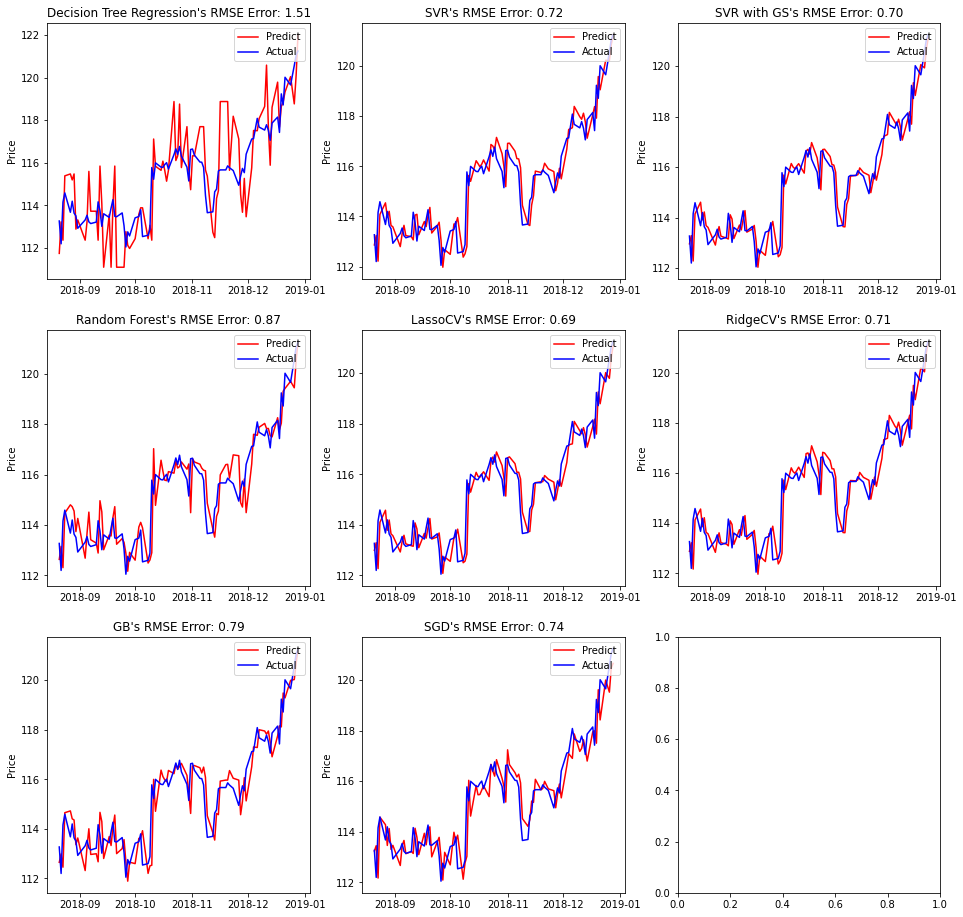

In [57]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot block
    ax_x = 0
    ax_y = 0
    #plot model
    for name, model in models.items():
        predicted = model.predict(val_x)
        RSME_score = np.sqrt(mean_squared_error(val_y, predicted))

           
        axes[ax_x][ax_y].plot(val_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(val_y.index, val_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(models)

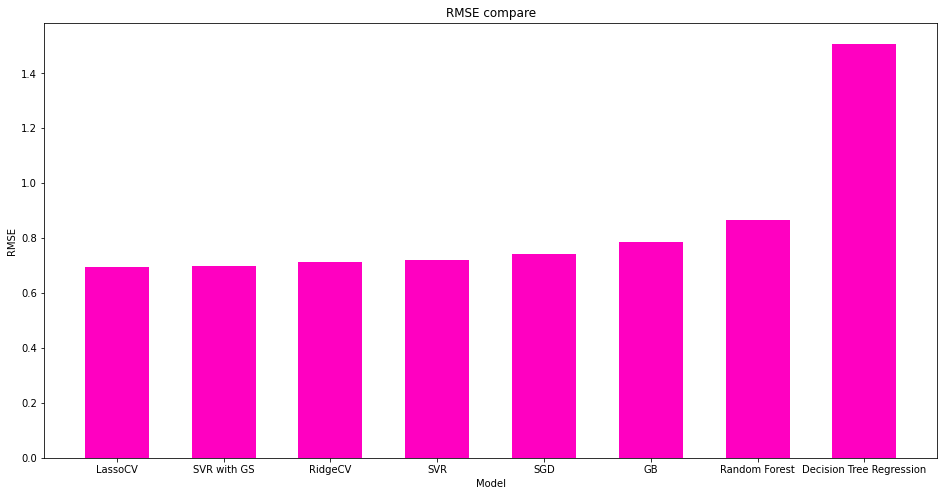

In [58]:
import numpy as np
%matplotlib inline

model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(columns, values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(columns, columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

In [59]:
#Hasil dari model yang sudah dibuat
print('Peringkat dari Model yang telah dibuat')
results = [['LassoCV',  0.693, 0.889],
           ['SVR with Hyperparameter',0.697, 0.887], 
           ['RidgeCV', 0.711, 0.883],
           ['Support Vector Regressor',  0.719, 0.880],
           ['Stochastic Gradient Descent', 0.785, 0.857],
           ['Gradient Boosting', 0.786, 0.857],
           ['Random Forest', 0.865, 0.827],
           ['Decision Tree Regression', 1.507, 0.476]]

results_df = pd.DataFrame(results, columns=['Model Type', 'RMSE', 'R2 Score'])
results_df

Peringkat dari Model yang telah dibuat


,Model Type,RMSE,R2 Score
0,LassoCV,0.693,0.889
1,SVR with Hyperparameter,0.697,0.887
2,RidgeCV,0.711,0.883
3,Support Vector Regressor,0.719,0.880
4,Stochastic Gradient Descent,0.785,0.857
5,Gradient Boosting,0.786,0.857
6,Random Forest,0.865,0.827
7,Decision Tree Regression,1.507,0.476


Dari hasil yang didapatkan dari pembuatan beberapa model diatas maka didapatkan nilai RMSE dan R2 Score seperti diatas. Sehingga dapat digunakan model dengan nilai RMSE terendah untuk digunakan sebagai model prediksi harga emas. Model yang mungkin cocok untuk digunakan adalah LassoCV, SVR yang diberikan Hyperparameter Tunning, dan RidgeCV. 